In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
dataset = pd.read_csv('/content/sample_data/CO2_Emissions.csv')
dataset.head()


,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_(L/100_km),Fuel_Consumption_Hwy_(L/100_km),Fuel_Consumption_Comb_(L/100_km),Fuel_Consumption_Comb(mpg),CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [103]:
dataset.shape

(7385, 12)

In [104]:
duplicate = dataset.duplicated().sum()
print('There are {} duplicated rows in the data'.format(duplicate))

There are 1103 duplicated rows in the data


In [105]:
dataset.drop_duplicates(inplace=True)

In [106]:
dataset.reset_index(inplace=True, drop=True)
dataset.shape

(6282, 12)

In [107]:
dataset.head()

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_(L/100_km),Fuel_Consumption_Hwy_(L/100_km),Fuel_Consumption_Comb_(L/100_km),Fuel_Consumption_Comb(mpg),CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [108]:
dataset.CO2_Emissions.describe()

count    6282.000000
mean      251.157752
std        59.290426
min        96.000000
25%       208.000000
50%       246.000000
75%       289.000000
max       522.000000
Name: CO2_Emissions, dtype: float64

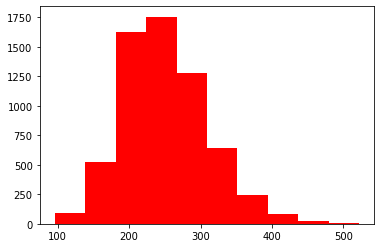

In [109]:
plt.hist(dataset.CO2_Emissions,color='Red')
plt.show()

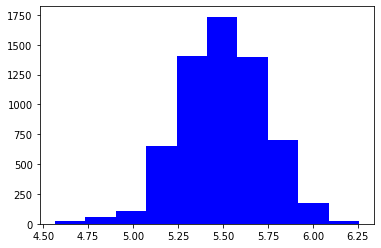

In [110]:
target =np.log(dataset.CO2_Emissions)
plt.hist(target,color='Blue')
plt.show()

In [111]:
numeric_features=dataset.select_dtypes(include=[np.number])
numeric_features.dtypes

Engine_Size(L)                      float64
Cylinders                             int64
Fuel_Consumption_City_(L/100_km)    float64
Fuel_Consumption_Hwy_(L/100_km)     float64
Fuel_Consumption_Comb_(L/100_km)    float64
Fuel_Consumption_Comb(mpg)            int64
CO2_Emissions                         int64
dtype: object

In [112]:
corr=numeric_features.corr()
print(corr['CO2_Emissions'].sort_values(ascending=False)[:5],'\n')
print(corr['CO2_Emissions'].sort_values(ascending=False)[-5:],'\n')

CO2_Emissions                       1.000000
Fuel_Consumption_City_(L/100_km)    0.918756
Fuel_Consumption_Comb_(L/100_km)    0.916840
Fuel_Consumption_Hwy_(L/100_km)     0.883424
Engine_Size(L)                      0.854802
Name: CO2_Emissions, dtype: float64 

Fuel_Consumption_Comb_(L/100_km)    0.916840
Fuel_Consumption_Hwy_(L/100_km)     0.883424
Engine_Size(L)                      0.854802
Cylinders                           0.834687
Fuel_Consumption_Comb(mpg)         -0.906783
Name: CO2_Emissions, dtype: float64 



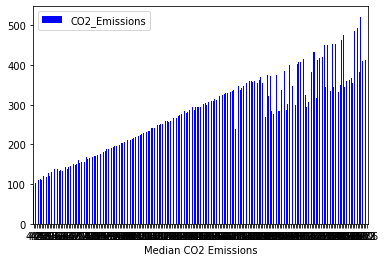

In [113]:
Fuel_consumption_city_pivot = dataset.pivot_table(index='Fuel_Consumption_City_(L/100_km)',values='CO2_Emissions', aggfunc=np.median)
Fuel_consumption_city_pivot.plot(kind='bar', color='blue')

plt.xlabel('Fuel_Consumption_City_(L/100_km)')
plt.xlabel('Median CO2 Emissions')
plt.xticks(rotation=0)
plt.show()

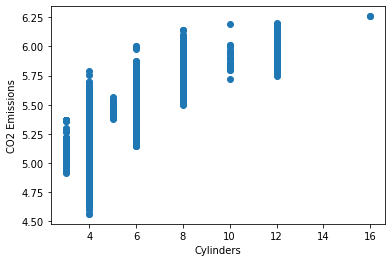

In [114]:
plt.scatter(x = dataset['Cylinders'], y=np.log(dataset['CO2_Emissions']))
plt.ylabel('CO2 Emissions')
plt.xlabel('Cylinders')

plt.show()


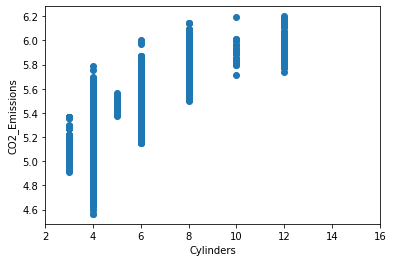

In [115]:
dataset = dataset[dataset['Cylinders']< 14]

plt.scatter(x=dataset['Cylinders'], y=np.log(dataset.CO2_Emissions))

plt.xlim(2,16)
plt.ylabel('CO2_Emissions')
plt.xlabel('Cylinders')

plt.show()


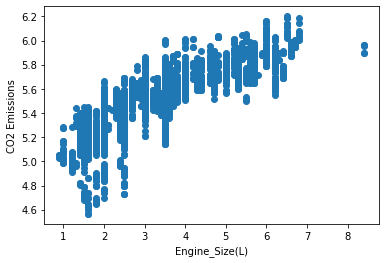

In [116]:
plt.scatter(x = dataset['Engine_Size(L)'], y=np.log(dataset['CO2_Emissions']))
plt.ylabel('CO2 Emissions')
plt.xlabel('Engine_Size(L)')

plt.show()

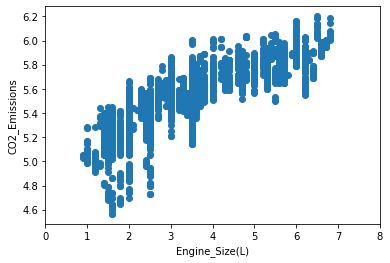

In [117]:
dataset = dataset[dataset['Engine_Size(L)']< 8]

plt.scatter(x=dataset['Engine_Size(L)'], y=np.log(dataset.CO2_Emissions))

plt.xlim(0,8)
plt.ylabel('CO2_Emissions')
plt.xlabel('Engine_Size(L)')

plt.show()


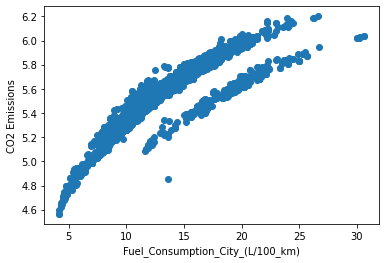

In [118]:
plt.scatter(x = dataset['Fuel_Consumption_City_(L/100_km)'], y=np.log(dataset['CO2_Emissions']))
plt.ylabel('CO2 Emissions')
plt.xlabel('Fuel_Consumption_City_(L/100_km)')

plt.show()

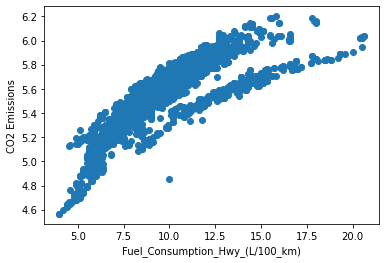

In [119]:
plt.scatter(x = dataset['Fuel_Consumption_Hwy_(L/100_km)'], y=np.log(dataset['CO2_Emissions']))
plt.ylabel('CO2 Emissions')
plt.xlabel('Fuel_Consumption_Hwy_(L/100_km)')

plt.show()

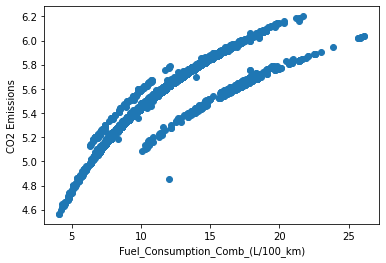

In [120]:
plt.scatter(x = dataset['Fuel_Consumption_Comb_(L/100_km)'], y=np.log(dataset['CO2_Emissions']))
plt.ylabel('CO2 Emissions')
plt.xlabel('Fuel_Consumption_Comb_(L/100_km)')

plt.show()

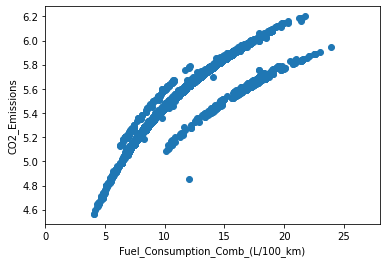

In [121]:
dataset = dataset[dataset['Fuel_Consumption_Comb_(L/100_km)']< 25]

plt.scatter(x=dataset['Fuel_Consumption_Comb_(L/100_km)'], y=np.log(dataset.CO2_Emissions))

plt.xlim(0,28)
plt.ylabel('CO2_Emissions')
plt.xlabel('Fuel_Consumption_Comb_(L/100_km)')

plt.show()

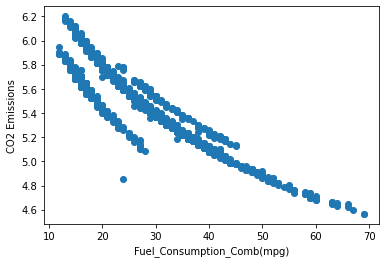

In [122]:
plt.scatter(x = dataset['Fuel_Consumption_Comb(mpg)'], y=np.log(dataset['CO2_Emissions']))
plt.ylabel('CO2 Emissions')
plt.xlabel('Fuel_Consumption_Comb(mpg)')

plt.show()

In [123]:
dataset.shape

dataset.head()

,Make,Model,Vehicle_Class,Engine_Size(L),Cylinders,Transmission,Fuel_Type,Fuel_Consumption_City_(L/100_km),Fuel_Consumption_Hwy_(L/100_km),Fuel_Consumption_Comb_(L/100_km),Fuel_Consumption_Comb(mpg),CO2_Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [124]:
nulls=pd.DataFrame(dataset.isnull().sum().sort_values(ascending=False)[:13])
nulls.columns=['Null Count']
nulls.index.name='Feature'
nulls


,Null Count
Feature,
Make,0
Model,0
Vehicle_Class,0
Engine_Size(L),0
Cylinders,0
Transmission,0
Fuel_Type,0
Fuel_Consumption_City_(L/100_km),0
Fuel_Consumption_Hwy_(L/100_km),0


In [125]:
categoricals=dataset.select_dtypes(exclude=[np.number])

categoricals.describe()

,Make,Model,Vehicle_Class,Transmission,Fuel_Type
count,6267,6267,6267,6267,6267
unique,40,2046,16,27,5
top,FORD,F-150 FFV,SUV - SMALL,AS6,X
freq,577,32,1006,1139,3039


In [126]:
data= dataset.select_dtypes(include=[np.number])

data.head()




,Engine_Size(L),Cylinders,Fuel_Consumption_City_(L/100_km),Fuel_Consumption_Hwy_(L/100_km),Fuel_Consumption_Comb_(L/100_km),Fuel_Consumption_Comb(mpg),CO2_Emissions
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [127]:
y=np.log(dataset.CO2_Emissions)
X=data.drop(['CO2_Emissions'],axis=1)



In [128]:
from sklearn.preprocessing import MinMaxScaler
mmsc = MinMaxScaler()
mmsfit = mmsc.fit(X)
X_t = pd.DataFrame(mmsc.fit_transform(X), columns = ['Engine_Size(L)','Cylinders','Fuel_Consumption_City_(L/100_km)',
                                                                'Fuel_Consumption_Hwy_(L/100_km)','Fuel_Consumption_Comb_(L/100_km)','Fuel_Consumption_Comb(mpg'])



In [129]:
X = X_t.copy()

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle =True)

In [131]:
X_train.head()

,Engine_Size(L),Cylinders,Fuel_Consumption_City_(L/100_km),Fuel_Consumption_Hwy_(L/100_km),Fuel_Consumption_Comb_(L/100_km),Fuel_Consumption_Comb(mpg
4844,0.355932,0.333333,0.448889,0.387879,0.429293,0.175439
4945,0.101695,0.111111,0.226667,0.230303,0.227273,0.368421
5157,0.745763,0.555556,0.777778,0.624242,0.722222,0.052632
4785,0.338983,0.333333,0.440000,0.387879,0.419192,0.192982
352,0.440678,0.333333,0.404444,0.321212,0.373737,0.228070


In [132]:
y_train.head()

4858    5.683580
4960    5.332719
5172    5.720312
4799    5.676754
354     5.575949
Name: CO2_Emissions, dtype: float64

In [133]:
from sklearn.linear_model import LinearRegression

LinearRegressionModel = LinearRegression()

LinearRegressionModel.fit(X_train, y_train)

print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is  : ' , LinearRegressionModel.score(X_test, y_test))
print('Linear Regression Coef is        : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is   : ' , LinearRegressionModel.intercept_)

Linear Regression Train Score is :  0.9304195473332993
Linear Regression Test Score is  :  0.9313391998571512
Linear Regression Coef is        :  [ 0.11388238  0.2173669   0.08776905  0.35342488 -0.53224364 -1.49092095]
Linear Regression intercept is   :  5.838791108066369


In [138]:
y_pred_linear = LinearRegressionModel.predict(X_test)
print('Y predict: ',y_pred_linear[:5])
print('Y test:\n',y_test[:5])

Y predict:  [5.53639499 5.88334434 5.68282891 5.28085469 5.19799735]
Y test:
 4816    5.529429
5155    5.777652
5814    5.669881
2163    5.262690
4638    5.214936
Name: CO2_Emissions, dtype: float64


In [139]:
from sklearn.metrics import mean_squared_error

print('root square error is',LinearRegressionModel.score(X_test, y_test))

predictions=LinearRegressionModel.predict(X_test)

print('RMSE', mean_squared_error(y_test, predictions))

root square error is 0.9313391998571512
RMSE 0.003670649238878743


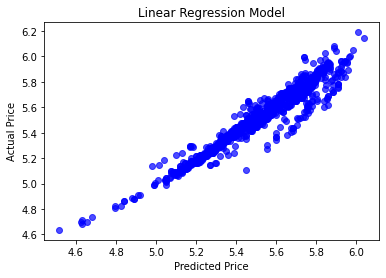

In [143]:
actual_values=y_test
plt.scatter(predictions, actual_values,alpha=.7, color='b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

plt.show()